# "Behavior Prediction and Decision Making in Self-Driving Cars Using Deep Learning"
> "Data-driven behavior prediction and decision making in self-driving cars"

- toc:true
- branch: master
- badges: true
- comments: true
- author: Isaac Kargar
- categories: [jupyter]

In this post, I want to talk about different approaches for motion prediction and decision making using Machine Learning and Deep Learning (DL) in self-driving cars (SDCs). I tried to select works and papers from interesting companies and startups to cover different approaches in this area. This is a summary of my talk for the robotics seminar series at the Aalto University.

In general, we can consider the following software stack for self-driving cars:

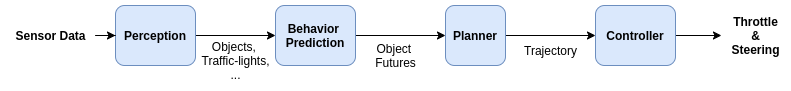


As you can see in the above figure, we have the **Perception** module which gets sensor data and does some tasks like, object detection, traffic light detection, traffic light state detection, localization, …. Then the **Behavior Prediction** module will get this information and try to predict the future trajectory of other agents in the scene. After that, the **Planner** module will get these future trajectories to use them in its decision making procedure. It is possible to use some information from the **Perception** module too. Then the **Controller** will get the trajectory generated by the **Planner** and generate control commands like throttle and steering. We have also some other information like HDMap info which different modules can use based on the techniques they are using.

Each one of the following modules can use ML separately or it is also possible to combine several modules and use one single ML model to do several tasks together. We will talk about some of them in the rest of this post.

# Behavior Prediction
The first approach is to use ML and DL in the **Behavior Prediction** module.

## Uncertainty-aware Short-term Motion Prediction of Traffic Actors for Autonomous Driving
This work is form Uber to do motion prediction for other agents in the scene. This technique can be used for the Behavior Prediction module only. They get the information from the Perception module and HDMap and render them on one single RGB image to create a bird-eye view image. They also render motion history of agents on the image to include temporal information and to be able to extract motion information for motion prediction. This type of input representation is going to be popular because it is easy to combine several sources of information and use CNNs to extract features. There are also some other ways instead of rendering history on one single image to extract temporal information. We can stack several frames for sequential time-steps or use CNNs to extract features from each frame and then use LSTMs to extract temporal info. In summary, the input and outputs of their model is as follows:

- Input: BEV image + (velocity, acceleration, heading change rate)
- Output: (x, y, std) for each point in the trajectory

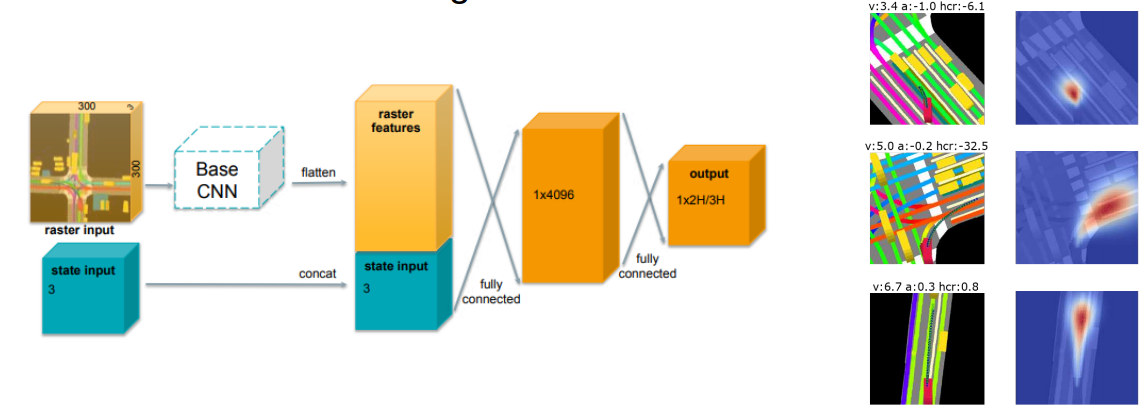

For trajectory prediction, it is also possible to use LSTM networks to generate waypoints in the trajectory sequentially.

## Multimodal trajectory predictions for autonomous driving using deep convolutional networks

This is an extension of the previous work to predict multi-modal future trajectory prediction. The network almost the same except the final layer to predict M trajectories with their probability.

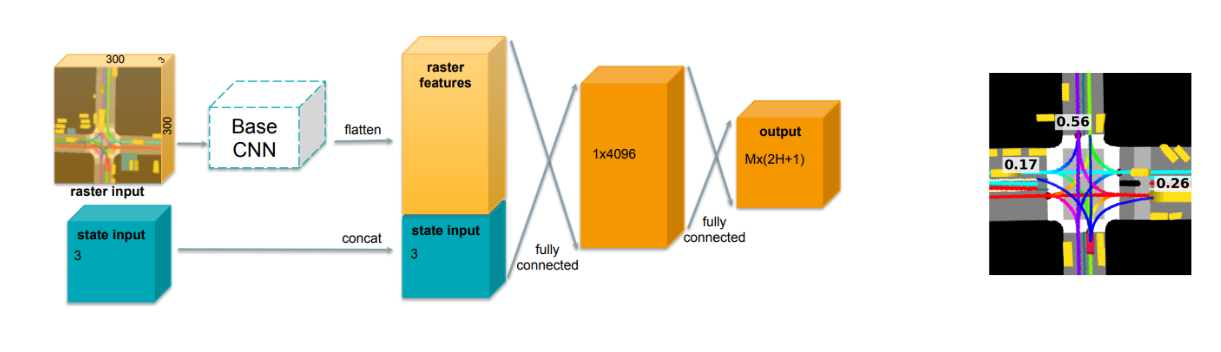
[source](https://arxiv.org/pdf/1809.10732.pdf)